In [2]:
print('Hyperparameter Optimization using RandomizedSearchCV')

Hyperparameter Optimization using RandomizedSearchCV


In [14]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
dataset = pd.read_csv('train_titanic.csv')
print('Preview of data: ')

labels = dataset['Survived']
dataset.drop(['Survived'],axis=1,inplace=True)
display(dataset.head())

Preview of data: 


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
print('Dropping unnecessary columns.')
dataset.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
display(dataset.head())

Dropping unnecessary columns.


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [63]:
print('Converting categorical data into pure integers.')
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

temp = encoder.fit_transform(dataset['Sex'])

dataset['Embarked'] = dataset['Embarked'].astype(str)#converting character values to string
temp2 = encoder.fit_transform(dataset['Embarked'])

dataset.drop(['Sex','Embarked'],axis=1,inplace=True)

dataset['Sex'] = temp
dataset['Embarked'] = temp2

display(dataset.head())

Converting categorical data into pure integers.


,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3,22.0,1,0,7.2500,1,2
1,1,38.0,1,0,71.2833,0,0
2,3,26.0,0,0,7.9250,0,2
3,1,35.0,1,0,53.1000,0,2
4,3,35.0,0,0,8.0500,1,2


In [65]:
print('Removing NaN values')

dataset.fillna({
    'Age':dataset['Age'].mean()
},inplace=True)
dataset.info()

Removing NaN values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Sex       891 non-null    int64  
 6   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


Correlation matrix


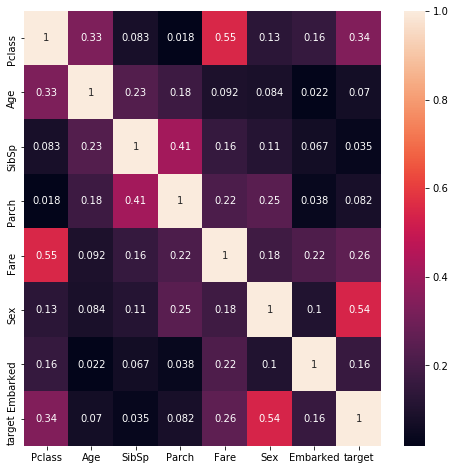

In [68]:
print('Correlation matrix')
dataset['target'] = labels
cor = dataset.corr().abs()
plt.figure(figsize=(8,8))
sns.heatmap(cor,annot=True)
plt.show()
dataset.drop(['target'],axis=1,inplace=True)

In [72]:
print('Perform train-test split.')

from sklearn.model_selection import train_test_split

train_data,test_data,train_labels,test_labels = train_test_split(dataset,labels,test_size=0.2,random_state=42)

print('Train data size',train_data.shape,'\nTrain labels size: ',train_labels.shape)
print('Test data size',test_data.shape,'\nTest labels size: ',test_labels.shape)

Perform train-test split.
Train data size (712, 5) 
Train labels size:  (712,)
Test data size (179, 5) 
Test labels size:  (179,)


In [81]:
print('Scaling features.')

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

temp = scaler.fit_transform(train_data)
train_data_prep = pd.DataFrame(temp)
display(train_data_prep.head())

Scaling features.


,0,1,2,3,4
0,-1.614136,1.229207,-0.078684,0.724310,0.557444
1,-0.400551,-0.503505,-0.377145,0.724310,0.557444
2,0.813034,0.189580,-0.474867,0.724310,0.557444
3,0.813034,-0.272477,-0.476230,0.724310,0.557444
4,0.813034,-1.812666,-0.025249,-1.380624,0.557444


In [98]:
print('Using SVC with default parameters(randomly chosen parameters). ')

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

svc_1 = SVC(kernel='linear')
svc_1.fit(train_data_prep,train_labels)

test_data_prep = scaler.transform(test_data)

train_mse_1 = -cross_val_score(svc_1,train_data_prep,train_labels,scoring='neg_mean_squared_error',cv=10).mean()
test_mse_1 = mean_squared_error(svc_1.predict(test_data_prep),test_labels)

print('Train MSE: ',train_mse_1,'\nTest MSE: ',test_mse_1)

Using SVC with default parameters(randomly chosen parameters). 
Train MSE:  0.21208920187793426 
Test MSE:  0.21787709497206703


In [104]:
print('Using SVC withoptimized hyperparameter using RandomizedSearchCV.')

parameter = [{'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}]

from sklearn.model_selection import RandomizedSearchCV

rscv = RandomizedSearchCV(estimator=svc_1,
                          param_distributions=parameter,
                          scoring='neg_mean_squared_error',
                          cv=10,
                          n_jobs=-1)

rscv.fit(train_data_prep,train_labels)

print('Best Params: ',rscv.best_params_)

Using SVC withoptimized hyperparameter using RandomizedSearchCV.
Best Params:  {'kernel': 'rbf', 'gamma': 0.8, 'C': 1}


In [105]:
print('Using the params as suggested by RandomizedSearchCV.')

svc_2 = SVC(kernel='rbf', gamma= 0.4, C=1)
svc_2.fit(train_data_prep,train_labels)

train_mse_2 = -rscv.best_score_
test_mse_2 = mean_squared_error(svc_2.predict(test_data_prep),test_labels)

print('Train MSE: ',train_mse_2,'\nTest MSE: ',test_mse_2)

Using the params as suggested by RandomizedSearchCV.
Train MSE:  0.18114241001564943 
Test MSE:  0.2122905027932961
